In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [2]:
# Load data
data = pd.read_csv('/kaggle/input/dataset-original/Dataset_Original/UTK/train.csv')

# Data overview

In [3]:
# Data exploration
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1


In [4]:
print(data['label'].value_counts())

label
1    10413
0    10387
Name: count, dtype: int64


# Missing & duplicate values

In [5]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
# Number of unique values in title
num_unique_values = data['title'].nunique()
print(f'{num_unique_values}/{data.shape[0]}')

19803/20800


In [7]:
# Number of unique values in text
num_unique_values = data['text'].nunique()
print(f'{num_unique_values}/{data.shape[0]}')

20386/20800


# Distribution of title length

In [40]:
# Kiểm tra các giá trị không phải là chuỗi trong cột 'title'
non_string_title = data['title'].apply(lambda x: not isinstance(x, str))
print(data[non_string_title].sample(10))
# Kiểm tra và đếm số giá trị không phải chuỗi trong cột 'title'
non_string_title_count = non_string_title.sum()
print("Count of values that not a string value in 'title':", non_string_title_count)


          id title                author  \
13892  13892   NaN             Jeannette   
1453    1453   NaN       peter kropotkin   
1292    1292   NaN             Anonymous   
19292  19292   NaN  Pam Wilkerson Harrod   
18622  18622   NaN       Rejean Paquette   
1808    1808   NaN             Anonymous   
8481    8481   NaN        Gary Clevenger   
14538  14538   NaN          WhollyShiite   
10793  10793   NaN                    MR   
8820    8820   NaN           Tina Martin   

                                                    text  label  title_length  \
13892                                                  🙂      1           NaN   
1453                                    "allies" cringe.      1           NaN   
1292   Same people all the time , i dont know how you...      1           NaN   
19292  Stolen, but factual! Just shows how crooked th...      1           NaN   
18622  Shawn please don't send him to Canada, we have...      1           NaN   
1808   Same people all the ti

=> 558 giá trị title không phải là chuỗi

In [9]:
is_string_titles = data['title'].apply(lambda x: isinstance(x, str))
# Tính độ dài của mỗi tiêu đề và thêm vào DataFrame dưới dạng cột mới 'title_length'
data['title_length'] = data['title'][is_string_titles].apply(len)

# In ra các thống kê về độ dài của các tiêu đề
print(data['title_length'].describe())

count    20242.000000
mean        74.319336
std         23.161910
min          3.000000
25%         60.000000
50%         75.000000
75%         88.000000
max        456.000000
Name: title_length, dtype: float64


In [10]:
print(data[data['title_length']==3]['title'])

15728    Rum
Name: title, dtype: object


In [11]:
print(data[data['title_length']==456]['title'])

1173    Roger Stone update on Stop the Steal exit poll...
Name: title, dtype: object


In [12]:
# Define a pattern for JavaScript code
pattern = r'<script.*?</script>'

# Find examples that contain JavaScript code
js_examples = data[data['text'].str.contains(pattern, regex=True, na=False)]

# Print the first few examples
print(js_examples.head())

          id                                    title             author  \
10666  10666  CodeSOD: Classic WTF: Injection Proof'd  Alex Papadimoulis   

                                                    text  label  title_length  
10666  Founder, The Daily WTF It's Thanksgiving, in t...      1          39.0  


# Distribution of news length

In [13]:
# Kiểm tra các giá trị không phải là chuỗi trong cột 'title'
non_string_text = data['text'].apply(lambda x: not isinstance(x, str))
print(data[non_string_text])
# Kiểm tra và đếm số giá trị không phải chuỗi trong cột 'title'
non_string_text_count = non_string_text.sum()
print("Count of values that not a string value in 'text':", non_string_text_count)


          id                                              title author text  \
142      142  Gorafi Magazine : Entretien exclusif avec Bara...    NaN  NaN   
573      573  Le top des recherches Google passe en top des ...    NaN  NaN   
1200    1200  La Corée du Nord annonce avoir envoyé un missi...    NaN  NaN   
1911    1911  Grand-Prix du Brésil – Romain Grosjean obtient...    NaN  NaN   
2148    2148  Gorafi Magazine: Barack Obama « Je vous ai déj...    NaN  NaN   
2169    2169  #NDDL: Pour fêter l’autorisation des travaux, ...    NaN  NaN   
2793    2793  «Pourquoi je suis candidat à la présidentielle...    NaN  NaN   
3329    3329  GuinessBook : 100 millions d’Américains batten...    NaN  NaN   
3729    3729  Les Américains ne sont plus qu’à quelques heur...    NaN  NaN   
4288    4288            Hillary Clinton en 5 dates >> Le Gorafi    NaN  NaN   
4358    4358  Ne supportant plus l’ambiance de la campagne é...    NaN  NaN   
5717    5717  SPA : Enfermé depuis trois jours dans 

=> Số text không phải str = số text mang giá trị null

In [14]:
is_string_texts = data['text'].apply(lambda x: isinstance(x, str))
data['sentence_length'] = data['text'][is_string_texts].apply(len)
print(data['sentence_length'].describe())

count     20761.000000
mean       4558.763836
std        5140.507609
min           1.000000
25%        1632.000000
50%        3369.000000
75%        6279.000000
max      143365.000000
Name: sentence_length, dtype: float64


In [15]:
# Describe 'sentence_length' for label 0
print(data[data['label'] == 0]['sentence_length'].describe())

# Describe 'sentence_length' for label 1
print(data[data['label'] == 1]['sentence_length'].describe())

count    10387.000000
mean      5214.130452
std       4313.791236
min          3.000000
25%       2397.000000
50%       4591.000000
75%       7015.000000
max      85948.000000
Name: sentence_length, dtype: float64
count     10374.000000
mean       3902.575959
std        5778.622320
min           1.000000
25%        1062.000000
50%        2371.000000
75%        4826.000000
max      143365.000000
Name: sentence_length, dtype: float64


## Below 10 characters

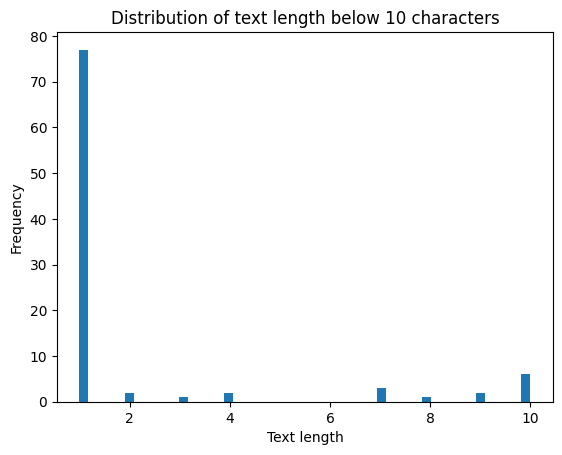

In [16]:
plt.hist(data['sentence_length'], bins=50, range=[1, 10])
plt.title('Distribution of text length below 10 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [17]:
print(data[data['sentence_length']<10])

          id                                              title  \
82        82                         Huma’s Weiner Dogs Hillary   
169      169  Mohamad Khweis: Another “Virginia Man” (Palest...   
295      295  A Connecticut Reader Reports Record Voter Regi...   
470      470  BULLETIN: There ARE Righteous Jews For Trump!;...   
592      592  Is your promising internet career over now Vin...   
...      ...                                                ...   
19929  19929  98% of public now ‘really looking forward’ to ...   
20141  20141  Thomas Frank Explores Whether Hillary Clinton ...   
20242  20242  Radio Derb Transcript For October 21 Up: The M...   
20264  20264  Pro-sovereignty Legislators Demand That Admini...   
20513  20513  SAID IN SPANISH: A Mexican Governor Meddles In...   

                           author text  label  title_length  sentence_length  
82                   Steve Sailer           1          26.0              1.0  
169                 James Fulford    

In [18]:
print(data['text'].loc[20513]) #không có gì

## From 10 to 100 characters

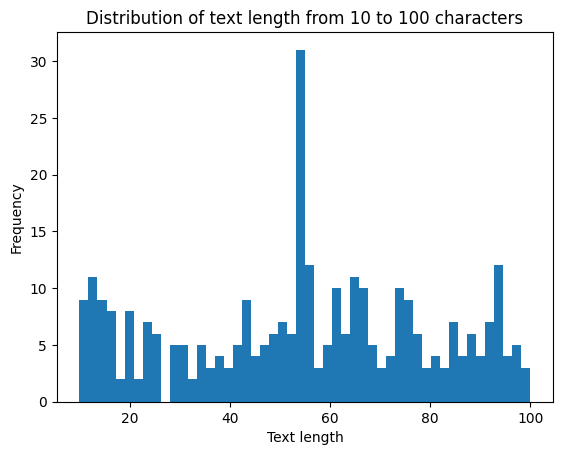

In [19]:
plt.hist(data['sentence_length'], bins=50, range=[10, 100])
plt.title('Distribution of text length from 10 to 100 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [20]:
filtered_data = data.loc[data['sentence_length'] == 54, ['text', 'label']]

# In ra nội dung của cột 'text' và 'label'
print(filtered_data)

                                                    text  label
519    source Add To The Conversation Using Facebook ...      1
567    GUYS THE PURGE WONT HAPPEN ITS A MOVIE ITS FAK...      1
725    And cops wonder why they get no respect. Stupi...      1
2089   Support Us The Arrivals Bosanski Prijevod 13-l...      1
3206   source Add To The Conversation Using Facebook ...      1
4726   source Add To The Conversation Using Facebook ...      1
4781   source Add To The Conversation Using Facebook ...      1
5052   source Add To The Conversation Using Facebook ...      1
5539   source Add To The Conversation Using Facebook ...      1
6891   source Add To The Conversation Using Facebook ...      1
7055   source Add To The Conversation Using Facebook ...      1
7628   source Add To The Conversation Using Facebook ...      1
7946   source Add To The Conversation Using Facebook ...      1
8386   source Add To The Conversation Using Facebook ...      1
8594   source Add To The Conversation Us

In [21]:
print(data['text'].loc[17354])

source Add To The Conversation Using Facebook Comments


In [22]:
filtered_data = data.loc[data['sentence_length'] == 94, ['text', 'label']]

# In ra nội dung của cột 'text' và 'label'
print(filtered_data)

                                                    text  label
4565   Chart Of The Day: In Lieu Of Growth, The Tech ...      1
4638   Clappers answer to peace is more Nuclear weapo...      1
10604  Support Us Summer Planespotting at London Heat...      1
12975  Año 63: Cupido logra que le validen la aptitud...      1
17421  They think the citizens are so stupid that the...      1


In [23]:
print(data['text'].loc[17421])

They think the citizens are so stupid that they will believe anything they say.WRONG. Go TRUMP


=> 2 cột cao nhất và nhì đều là unreliable text

## Above 100 characters

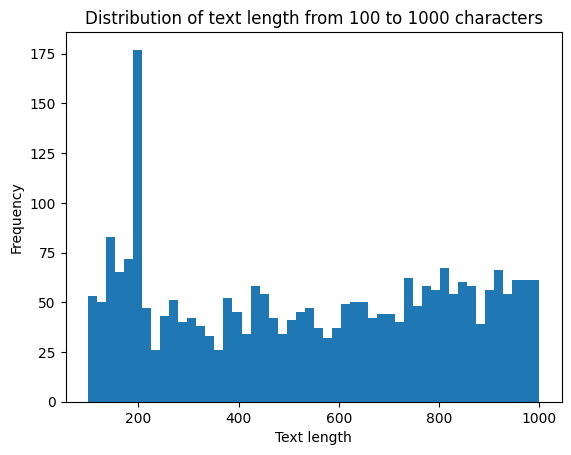

In [24]:
plt.hist(data['sentence_length'], bins=50, range=[100, 1000])
plt.title('Distribution of text length from 100 to 1000 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [25]:
pd.set_option('display.max_rows', None)
filtered_data = data.loc[data['sentence_length'] == 199, ['text', 'label']]
filtered_data_count = filtered_data.shape[0]

print('Count:', filtered_data_count)
print(filtered_data)


Count: 17
                                                    text  label
434    By Brandon Turbeville As the floodwaters reced...      1
1614   By Matt Agorist Kansas City, MO — Every year, ...      1
1926   The political climate of the current U.S. elec...      1
2035   Malala Yousufzai is a remarkable young woman w...      1
2398   More and more studies on the abilities of THC ...      1
2568   This Detroit, Michigan woman’s tweet will be y...      1
4970   By Alice Salles The 2016 U.S. election shocked...      1
5256   Sabine El Gemayel, director and producer of Ge...      1
6132   Op-Ed by Paul A. Philips Ever wondered how Big...      1
6929   By Cassius Kamarampi and Brandon Turbeville (E...      1
9520   President Donald Trump was the primary target ...      0
9734   By Christina Sarich A newly opened lab can now...      1
12517  By Claire Bernish, The Free Thought Project Fo...      1
14269  By Brandon Turbeville Anti-fluoridation activi...      1
16846  This cigarette lighter 

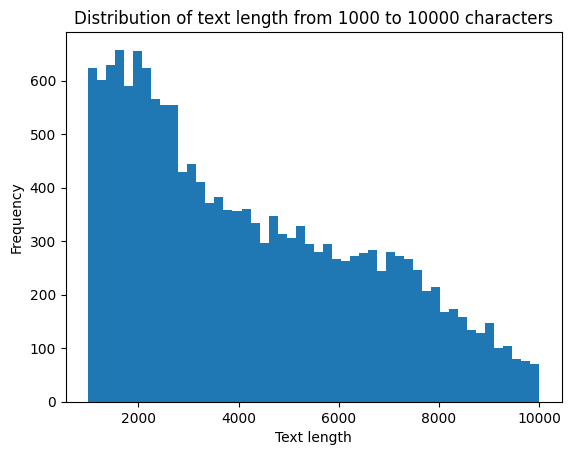

In [26]:
plt.hist(data['sentence_length'], bins=50, range=[1000, 10000])
plt.title('Distribution of text length from 1000 to 10000 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

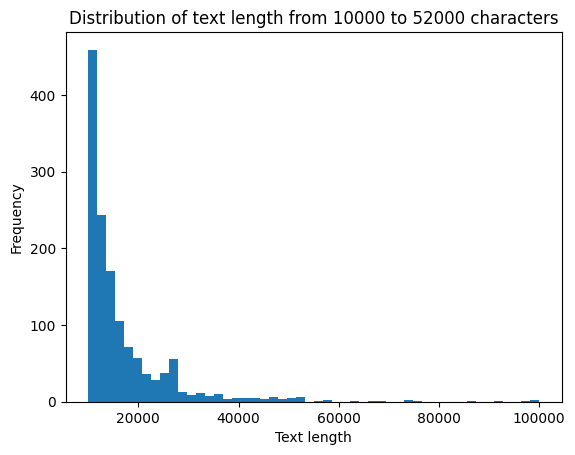

In [27]:
plt.hist(data['sentence_length'], bins=50, range=[10000, 100000])
plt.title('Distribution of text length from 10000 to 52000 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

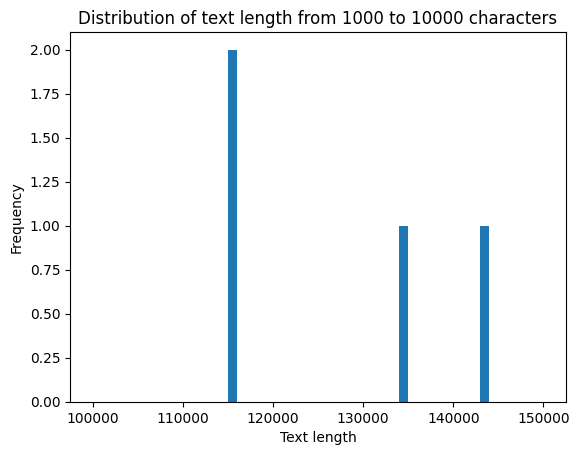

In [28]:
plt.hist(data['sentence_length'], bins=50, range=[100000, 150000])
plt.title('Distribution of text length from 1000 to 10000 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [29]:
print(data[data['sentence_length']>110000])

          id                                              title  \
7530    7530  Re: Why Are So Many People Choosing To Leave T...   
8719    8719  Re: How Many People Will Have To Migrate Out O...   
13533  13533  Re: The Hard Working American vs. The Governme...   
19764  19764  Заседание Международного дискуссионного клуба ...   

                  author                                               text  \
7530   BOOTOUTTHEBULLIES  Why Are So Many People Choosing To Leave The U...   
8719        Get it right  How Many People Will Have To Migrate Out Of Ca...   
13533         Janet Witt  The Hard Working American vs. The Government P...   
19764  Владимир В. Путин  Заседание Международного дискуссионного клуба ...   

       label  title_length  sentence_length  
7530       1          75.0         115848.0  
8719       1          89.0         115589.0  
13533      1          57.0         134808.0  
19764      1          73.0         143365.0  


## Sentence length and label correlation

In [30]:
# Filter the DataFrame for examples where the text below 100 characters
long_texts = data[data['text'].str.len() < 100]

# Get the label distribution
label_distribution = long_texts['label'].value_counts()

print(label_distribution)

label
1    402
0      2
Name: count, dtype: int64


In [31]:
# Filter the DataFrame for examples where the text exceeds 10000 characters
long_texts = data[(data['text'].str.len() >= 100) & (data['text'].str.len() <= 1000)]
# Get the label distribution
label_distribution = long_texts['label'].value_counts()

print(label_distribution)

label
1    2052
0     532
Name: count, dtype: int64


In [32]:
# Filter the DataFrame for examples where the text exceeds 10000 characters
l_texts = data[(data['text'].str.len() >= 1000) & (data['text'].str.len() <= 10000)]

# Get the label distribution
label_distribution = l_texts['label'].value_counts()

print(label_distribution)

label
0    9207
1    7196
Name: count, dtype: int64


In [33]:
# Filter the DataFrame for examples where the text exceeds 10000 characters
long_texts = data[data['text'].str.len() > 10000]

# Get the label distribution
label_distribution = long_texts['label'].value_counts()

print(label_distribution)

label
1    729
0    647
Name: count, dtype: int64


In [34]:
# Filter the DataFrame for examples where the text exceeds 10000 characters
long_texts = data[data['text'].str.len() > 90000]

# Get the label distribution
label_distribution = long_texts['label'].value_counts()

print(label_distribution)

label
1    8
Name: count, dtype: int64


In [35]:
# Plot function
def plot_wordcloud(type):
    wordcloud = WordCloud(width=800, height=600,
                        background_color='white',
                        stopwords=None,
                        min_font_size=10).generate(type)

    # Plot the WordCloud image
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()

In [36]:
# Lọc các hàng có giá trị null trong cột 'title' và 'text'
filtered_data = data.dropna(subset=['title', 'text'])

# Chuyển đổi các giá trị thành chuỗi và nối lại
fake_title = ' '.join(filtered_data[filtered_data['label'] == 1]['title'].astype(str))
fake_text = ' '.join(filtered_data[filtered_data['label'] == 1]['text'].astype(str))
true_title = ' '.join(filtered_data[filtered_data['label'] == 0]['title'].astype(str))
true_text = ' '.join(filtered_data[filtered_data['label'] == 0]['text'].astype(str))


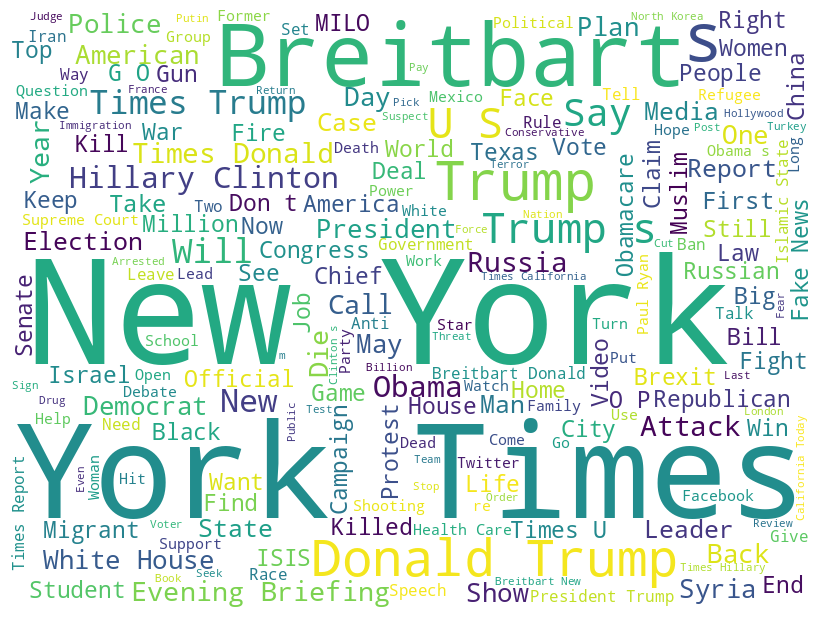

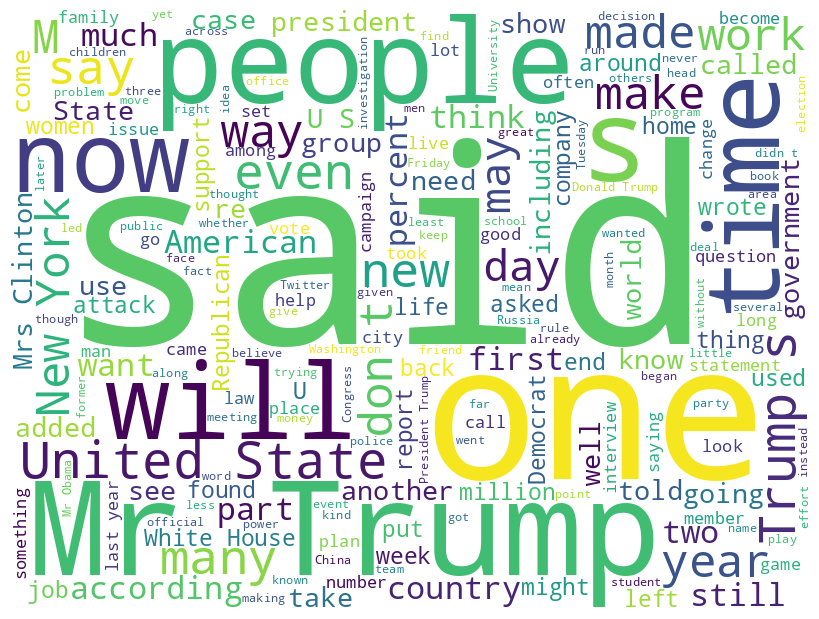

In [37]:
plot_wordcloud(true_title)
plot_wordcloud(true_text)

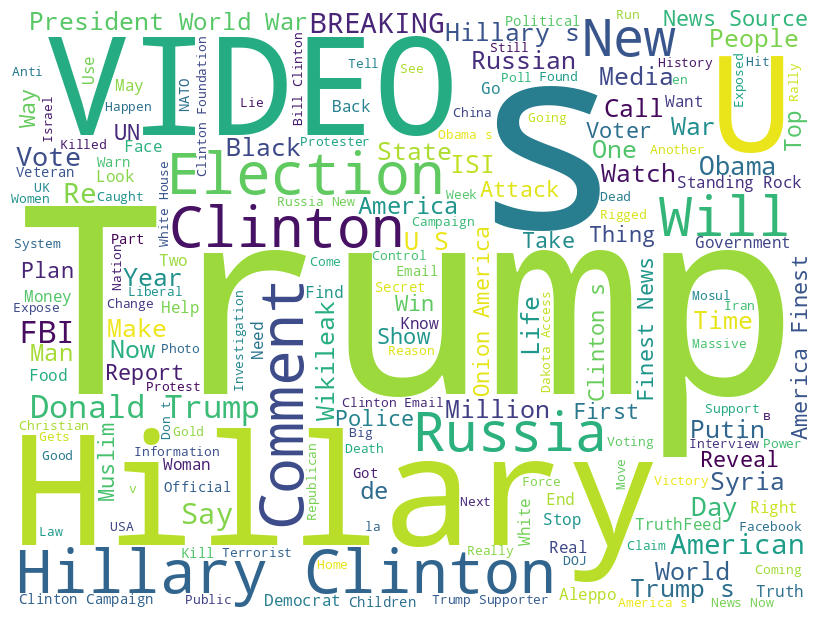

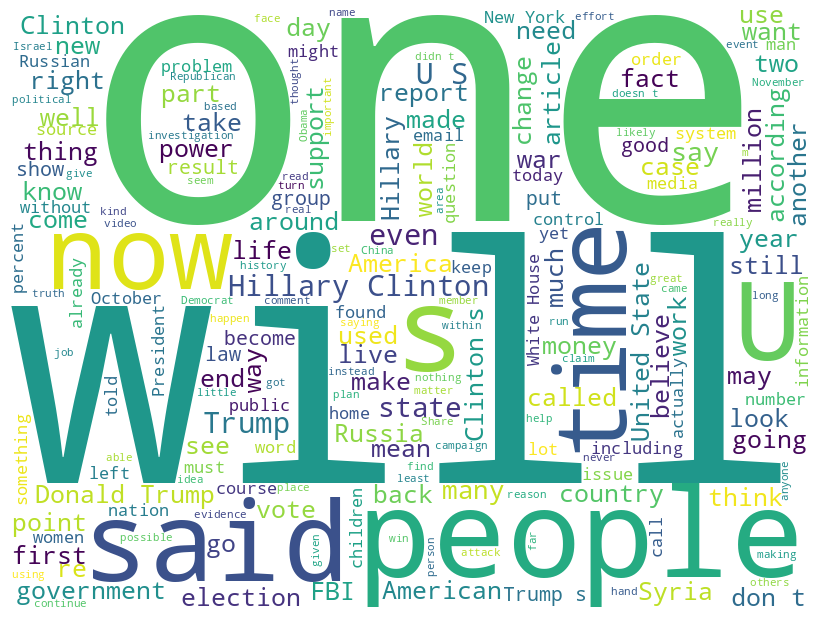

In [38]:
plot_wordcloud(fake_title)
plot_wordcloud(fake_text)